In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
from  sklearn import tree
from  sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [3]:
df = pd.read_csv('songs.csv')

X = df[['year', 'length','commas','exclamations','colons','hyphens']]
Y = df['artist']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=31)

In [4]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [5]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

## Задание:
увеличить значение метрики до 0.81 (в идеале хотелось бы 0.85)

- менять параметры дерева (criterion, max_depth, ...)
- разбиение тестовой, тренировочной выборки

In [6]:
depth = 1
f1 = 0
while f1 < 0.82:
    clf = DecisionTreeClassifier(class_weight='balanced', min_samples_split=32, max_depth=depth)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='micro')
    print(f1)
    print(depth)
    depth+=1


0.6333333333333333
1
0.7444444444444445
2
0.8111111111111111
3
0.8111111111111111
4
0.8222222222222222
5


In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm

array([[21,  5,  2],
       [ 5, 20,  1],
       [ 3,  0, 33]], dtype=int64)

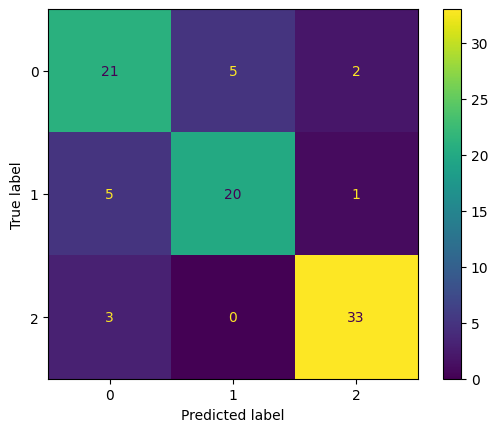

In [8]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<Axes: >

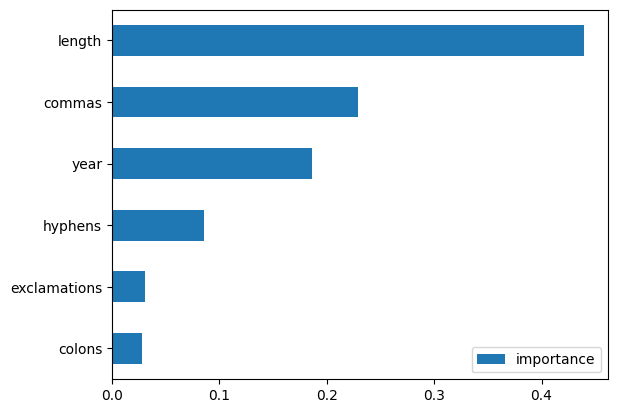

In [9]:
importances_df = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['importance'])
importances_df.sort_values(by='importance').plot(kind='barh')

In [21]:
from sklearn.model_selection import GridSearchCV
import numpy as np

np.random.seed = 31

clf = DecisionTreeClassifier(class_weight='balanced', random_state=31)

parameters = {'max_depth': range(1,10), 'min_samples_split': range(2, 40), 'criterion': ['gini', 'entropy', 'log_loss']}
search = GridSearchCV(clf, parameters, scoring='f1_micro')
search.fit(X, Y)
best_tree = search.best_estimator_

In [22]:
print(search.best_score_)
print(search.best_params_)

0.763888888888889
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 10}


In [24]:
y_pred = best_tree.predict(x_test)
f1 = f1_score(y_test, y_pred, average='micro')
f1

0.8777777777777778

In [26]:
from sklearn.model_selection import RandomizedSearchCV

search = RandomizedSearchCV(clf, parameters, scoring='f1_micro')
search.fit(X, Y)
best_tree = search.best_estimator_

In [27]:
print(search.best_score_)
print(search.best_params_)

0.7499999999999999
{'min_samples_split': 8, 'max_depth': 8, 'criterion': 'gini'}


In [28]:
y_pred = best_tree.predict(x_test)
f1 = f1_score(y_test, y_pred, average='micro')
f1

0.9